# Gantt chart

Draw a Gantt chart covering project progress

In [1]:
""" Draw a Gantt chart covering project progress """

from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATA_FILE = "csv/project-table.csv"
DATE_PATTERN = "%b %d, %Y"
START_DATE = datetime.strptime("Nov 1, 2021", DATE_PATTERN)
TODAY_DATE = datetime.today()

In [3]:
def make_color_dict(plot_data):
    """ assign colors to the task categories """
    task_categories = sorted(list(set(plot_data.loc[:, 3])))
    return {task_categories[i]: i for i in range(0, len(task_categories))}

In [4]:
def sort_labels(label_data):
    """ sort the graph labels alphabetically """
    handles, labels = label_data
    label_dict = {labels[i]: handles[i] for i in range(0, len(labels))}
    label_dict_sorted = {label: label_dict[label] for label in sorted(label_dict)}
    return list(label_dict_sorted.values()), list(label_dict_sorted.keys())

In [5]:
def read_plot_data(data_file):
    """ read the project task data from a file """
    plot_data = pd.read_csv(data_file, header=None)
    plot_data = plot_data.fillna(TODAY_DATE.strftime(DATE_PATTERN))
    return plot_data

In [6]:
def clip_bar_data(bar_data):
    """ remove values larger than today from bar_data """
    bar_data_clipped = []
    for bar_el in bar_data:
        if sum(bar_el) > (TODAY_DATE - START_DATE).days:
            bar_data_clipped.append([bar_el[0],
                                     bar_el[1] - sum(bar_el) + (TODAY_DATE - START_DATE).days])
        else:
            bar_data_clipped.append(bar_el)
    return bar_data_clipped

In [7]:
def make_bar_data(plot_data):
    """ make the data specifying the bars in the plot """
    bar_data = [[(datetime.strptime(row[1], DATE_PATTERN) - START_DATE).days,
                 (datetime.strptime(row[2], DATE_PATTERN) -
                  datetime.strptime(row[1], DATE_PATTERN)).days]
                for i, row in plot_data.iterrows()]
    return clip_bar_data(bar_data)

In [8]:
def make_color_data(plot_data):
    """ make the data specifying the colors of the bars in the plot """
    color_dict = make_color_dict(plot_data)
    color_data = [color_dict[plot_data.loc[i][3]] for i, row in plot_data.iterrows()]
    return color_data, color_dict

In [9]:
def draw_graph(plot_data, bar_data, color_data, color_dict):
    """ draw the graph """
    _, fig_id = plt.subplots(figsize=(10, 6))
    seen_label = {}
    for bar_data_id in range(0, len(bar_data)):
        label = list(color_dict.keys())[color_data[bar_data_id]]
        fig_id.broken_barh([bar_data[bar_data_id]],
                           (bar_data_id+0.1, 0.8),
                           color="C" + str(color_data[bar_data_id]),
                           label=label if label not in seen_label else "")
        fig_id.text(sum(bar_data[bar_data_id]) + 1,
                    bar_data_id + 0.3,
                    plot_data.loc[bar_data_id][0])
        seen_label[label] = True
    plt.xticks([0, 30, 61, 92, 120, 151], ["Nov", "Dec", "Jan", "Feb", "Mar", "Apr"])
    plt.yticks([], [])
    plt.legend(loc="upper left")
    for side in ["top", "left", "right"]:
        fig_id.spines[side].set_visible(False)
    handles, labels = sort_labels(plt.gca().get_legend_handles_labels())
    plt.legend(handles, labels, loc="upper left")
    plt.savefig("gantt_chart.png")
    plt.show()

In [10]:
def make_gantt_chart():
    """ main function: make gantt chart """
    plot_data = read_plot_data(DATA_FILE)
    bar_data = make_bar_data(plot_data)
    color_data, color_dict = make_color_data(plot_data)
    draw_graph(plot_data, bar_data, color_data, color_dict)

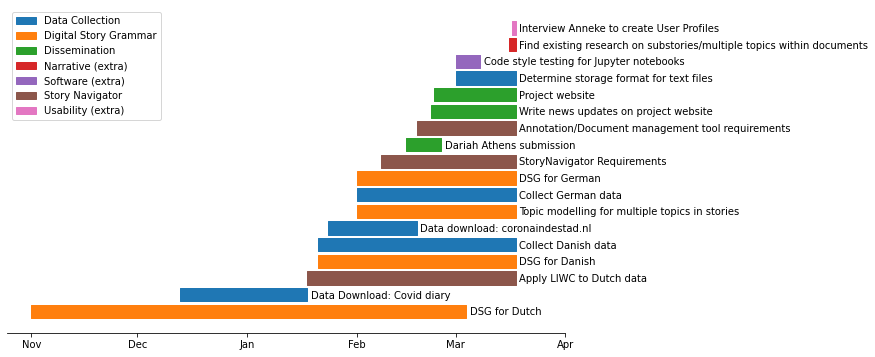

In [11]:
make_gantt_chart()